# ***Clustering kmeans***

**Referencia de ayuda:**
[Link](https://youtu.be/N5yZNAxLfkU)

### Contenido esperado

# 01_clustering_kmeans.ipynb
- Estandarización
- Elbow Method
- Silhouette Score
- Calinski-Harabasz
- Visualizaciones
- Insights por cluster


Objetivo: Minimzar la distancia entre grupos

**Métricas requeridas** 

- Silhouette Score
- Davies-Bouldin Index,
- Calinski-Harabasz Index
- Elbow Method
- Dendrogramas 

### Teoria y conceptos K-means

Existen diferentes métodos para aplicar la clusterización (agrupamiento de datos). Uno de los más conocidos es K-means.

**K-clusters**

Este algoritmo permite **agrupar las observaciones en un número determinado de grupos, llamados K-clusters**, donde K representa la cantidad de grupos que queremos formar.

El objetivo es dividir los datos en K grupos de manera que las observaciones dentro de cada cluster sean lo más similares posible entre sí.

**Varianza**

En K-means, se busca que la varianza dentro de cada cluster sea mínima **Intra-cluster medida**.

Esto significa que los puntos que pertenecen a un mismo grupo deben estar lo más cercanos posible a su centro, es decir, deben estar bien agrupados.

**Centroides**

CI (Centroide):
El centroide es el punto promedio que representa a un cluster.

Se calcula como la media de todos los puntos que pertenecen a ese grupo. Sin embargo, el centroide no necesariamente es un punto real del conjunto de datos, sino un punto calculado matemáticamente.

---

**K-Means (K-Medias) Media del conjunto de datos**

Cuando la media está bien definida, podemos identificar mejor cómo se distribuyen los datos y estimar una cantidad adecuada de grupos.

Sin embargo, no siempre trabajamos con datos numéricos. Cuando los datos son categóricos, el método K-means no es adecuado, y debemos utilizar otras variantes como K-modes.

**Métrica:** Distancia Euclidiana.

**K-Modes (K-Modas)**

K-modes es una variante de K-means diseñada para trabajar con datos categóricos.

En lugar de calcular la media, este método utiliza la moda (el valor que más se repite) para definir el centro del cluster.

Permite agrupar observaciones según la similitud de sus características categóricas.

**Métrica:** Desemejanza basada en coincidencias (si las categorías son iguales o no).

**K-Medians (K-Medianas)**

Similar a K-Means pero utiliza un estadístico diferente.

Centroide: Utiliza la media aritmética de los puntos en un clúster.

**Métrica:** Distancia Euclidiana.

Uso: Cuando tienes datos continuos y buscas grupos con forma esférica. Es sensible a outliers (valores atípicos).

**K-medoids**

K-medoids es otra variante similar a K-means.

La principal diferencia es que el representante del cluster (llamado medoide) siempre es un punto real del conjunto de datos, a diferencia del centroide en K-means.

Esto hace que K-medoids sea más robusto frente a valores atípicos (outliers).

**¿Como funciona?**

Lo que va a estar buscando ese centroide, al cual busca representar ese punto con respecto al conjunto de datos.

**¿Que pasa?**

se va a terminar asociando respecto a distancias y un punto aleatorio en el espacio. por ejemolo: genero 3 puntos aleatorios porque quiero generar 3 clusteres, pero en los 3 puntos caigan en un solo cluster, Esa ubicación que tenemos en ese cluster va a estar representadod de otra manera

**El algotirmo funciona de forma aleatoria**, ciertos puntos en la cual nos va a permitir a nosotros ubicarlos en cuanto a poder representar por distancia a que grupo
o cluster yo pertenezco.

**Métrica:** Generalmente la distancia Manhattan, aunque permite otras.

### **¿Cómo funciona K-Means por dentro (matemáticamente)?**

**1️. Representación formal de los clusters**

Consideremos
𝐶
1
,
𝐶
2
,
.
.
.
,
𝐶
𝐾
C1,C2,...,CK como conjuntos formados por los índices de las observaciones que pertenecen a cada cluster.

**Es decir:**

Cada cluster no guarda directamente los valores de los datos.

Guarda las posiciones (índices) de las filas del dataset que pertenecen a ese grupo.

**Ejemplo**

Supongamos el siguiente dataset:

Índice	X1	X2

0	1.0	2.0

1	1.2	1.9

2	8.0	8.5

3	7.8	8.2

Si aplicamos K-Means con K = 2, una posible partición sería:

C1 = {0, 1}

C2 = {2, 3}

**Esto significa:**

El cluster 1 contiene las observaciones 0 y 1.

El cluster 2 contiene las observaciones 2 y 3.

Matemáticamente, estamos dividiendo el conjunto total de índices en K subconjuntos disjuntos.

**2️. ¿Cómo se mide la varianza interna de un cluster?**

Existen dos formas equivalentes de medir la dispersión interna de un cluster:

**Medida 1 (la que usa Scikit-Learn)**

La suma de las distancias euclidianas al cuadrado entre cada observación y el centroide de su cluster.

Esto corresponde a la suma de cuadrados intra-cluster (Within Cluster Sum of Squares, WCSS).

Es la métrica que realmente optimiza K-Means.

**Medida 2 (forma alternativa equivalente)**

La suma de las distancias euclidianas al cuadrado entre todos los pares de observaciones dentro del cluster, dividida por el número de observaciones del cluster.

Ambas medidas son matemáticamente proporcionales, por lo que minimizar una equivale a minimizar la otra.

**3️. ¿Qué estamos buscando reiteradamente?**

**El objetivo del algoritmo es:**

- Minimizar la suma total de la varianza interna de todos los clusters.

**Es decir, queremos que:**

Los puntos dentro de cada grupo estén lo más cerca posible entre sí.

La dispersión interna total sea mínima.

**¡Importante: el mínimo global!**

Encontrar el mínimo global exacto es extremadamente complejo, debido a la enorme cantidad de formas en que n observaciones pueden distribuirse en K grupos.

El número de posibles particiones crece de manera combinatoria, por lo que evaluar todas las posibilidades no es viable computacionalmente.

**Por esta razón:**

K-Means no garantiza encontrar el mínimo global.

Encuentra un mínimo local.

El resultado depende de la inicialización.

**4️. ¿Qué ocurre internamente en el algoritmo?**

El algoritmo sigue un proceso iterativo:

**Paso 1:** Definir K

Se especifica el número de clusters que se desean crear.
En la práctica, muchas veces no se conoce el valor óptimo de K y debe estimarse mediante técnicas como el Método del Codo o Silhouette Score.

**Paso 2: Inicialización aleatoria**

Se seleccionan aleatoriamente K observaciones del dataset como centroides iniciales.

Si K = 5, se seleccionan 5 centroides.

Este paso es crucial porque la solución final depende de esta inicialización.

**Paso 3: Asignación**

Cada observación se asigna al centroide más cercano (según distancia euclidiana).

Esto forma los conjuntos C1, C2, ..., CK.

**Paso 4: Recalcular centroides**

Para cada cluster, se recalcula el centroide como el promedio de las observaciones que pertenecen a ese grupo.

**Paso 5: Iteración**

Los pasos 3 y 4 se repiten hasta que:

Las asignaciones ya no cambian, o

Los centroides cambian muy poco, o

Se alcanza un número máximo de iteraciones.

En cada iteración, la varianza interna total disminuye o se mantiene igual.

(Tambien se puede hacer un for para iterar el paso 3 y 4 hasta que al iterar las asignaciones y los centroides no hayan cambios).

**5️. Punto clave sobre Scikit-Learn**

En Scikit-Learn, el parámetro **n_init** ejecuta el algoritmo varias veces con distintas inicializaciones aleatorias y selecciona la mejor solución encontrada (la que tenga menor varianza interna total).

Esto reduce la probabilidad de quedar atrapado en una mala solución local.


### ¿Como sabemos que estamos haciendo una buena clusterización?

Tomaremos algunas referencias

- SSE = esa minimización de la varianza, entre las diferentes iteraciónes.

### Ventajas y desventajas

**Ventajas**

- Es muy facil de ocupar

- Metodos mas utlizados del clustering

- La velocidad de ejecución es rapida.


**Desventaja**

- Deberemos tener en cuenta, cuando clusters deberemos tener de antemano.

- Dificultad para detectar clustering alargados o irregulares.

- Las agrupaciónes pueden variar dependiendo de la asignacion aleatoria de los centroides, ejem: si tenemos 50 iteraciones y no logra converger, probablemente hayan vaores de un grupo que pertenecen a otros.

## **Iteraciónes de K o cantidad de clusteres**

si tenemos el problema de saber cual es la cantidad de k ideal, ¿Como nosotros vamos a poder hacerlo?.

Estos metodoos solo son orientativas, no es que deberia ser esa la cantidad.

### **Método Elbow (Método del Codo)**

El método del codo se utiliza para estimar el número óptimo de clusters (K) en K-Means.

**¿Qué se hace?**

Se ejecuta el algoritmo K-Means para distintos valores de K (por ejemplo, desde 1 hasta 10).

Para cada valor de K, se calcula la suma total de la varianza interna (Within Cluster Sum of Squares).

**Se construye un gráfico donde:**

En el eje horizontal se ubica el número de clusters (K).

En el eje vertical se ubica la suma de la varianza interna.

¿Qué se observa en el gráfico?

A medida que aumentamos el número de clusters:

La varianza interna siempre disminuye.

Esto ocurre porque los grupos se vuelven más pequeños y específicos.

Sin embargo, llega un punto donde la reducción deja de ser significativa.
Ese punto donde la curva cambia bruscamente de pendiente (parecido a un “codo”) indica el número óptimo de clusters.

-La idea es elegir el valor de K donde agregar más clusters ya no produce una mejora considerable en la reducción de la varianza.

**Importante**

El método del codo no entrega un valor exacto automáticamente.
Requiere interpretación visual del gráfico, ya que el punto de inflexión no siempre es completamente claro.

### Método Silhouette (Método de la Silueta)

El método de la silueta evalúa qué tan bien están agrupados los datos dentro de sus clusters y qué tan bien separados están de los demás clusters.

¿Qué mide?

Para cada observación, el índice de silueta mide:

Qué tan similar es al resto de los puntos de su propio cluster.

Qué tan diferente es respecto a los puntos del cluster más cercano.

El valor del índice de silueta varía entre -1 y 1:

Cercano a 1 → El punto está bien asignado a su cluster.

Cercano a 0 → El punto está en el límite entre dos clusters.

Cercano a -1 → El punto podría estar mal asignado.

¿Cómo se usa para elegir K?

Se calcula el promedio del índice de silueta para todos los puntos.

Se repite el proceso para distintos valores de K.

Se elige el valor de K que tenga el promedio de silueta más alto.

- Mientras mayor sea el índice promedio de silueta, mejor definidos y más separados están los clusters.

**Diferencia clave entre ambos métodos**

El método del codo mide reducción de varianza interna.

El método de la silueta mide calidad de separación y cohesión de los clusters.

In [18]:
%load_ext kedro.ipython 
catalog.keys()
df_fifa = catalog.load("model_input_table")

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


[02/25/26 23:12:25] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=380900;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=722674;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

#### **Importaciónes**

In [19]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos --
import seaborn as sns
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

# -- Procesado y modelado --
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler


# -- Modelo --
from sklearn.cluster import KMeans

# -- Metodo codo y silueta --
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# -- Metricas  --
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# -- Dendrogramas --
from scipy.cluster.hierarchy import dendrogram, linkage

In [20]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44967 entries, 0 to 44966
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       44967 non-null  int64  
 1   Overall                   44967 non-null  int64  
 2   Potential                 44967 non-null  int64  
 3   Special                   44967 non-null  int64  
 4   International Reputation  44967 non-null  float64
 5   Weak Foot                 44967 non-null  float64
 6   Skill Moves               44967 non-null  float64
 7   Jersey Number             44967 non-null  float64
 8   Crossing                  44967 non-null  float64
 9   Finishing                 44967 non-null  float64
 10  HeadingAccuracy           44967 non-null  float64
 11  ShortPassing              44967 non-null  float64
 12  Volleys                   44967 non-null  float64
 13  Dribbling                 44967 non-null  float64
 14  Curve 

#### **Antes de**

- Usar el el dataset procesado, no el original.
- Realizar un nuevo procesamiento para el aprendizaje no supervizados.
- Usa el dataset procesado… pero no el mismo que usamos para los modelos supervisados.
- Debe ser otro pipeline de procesamiento (normalización, encoding, imputación), exclusivo para no supervisados.

**Usa el dataset procesado para no supervisado, que debe cumplir:**

- Sin columnas de target
- Sin columnas categóricas sin codificar
- Con escalado uniforme (StandardScaler o MinMa
- Estandarización especial para clustering
  - Ej:
  - StandardScaler
  - MinMax
  - RobustScaler
  - (dependiendo del dataset y técnica)
- Sin one-hot innecesarios (UMAP y t-SNE sufren con alta dimensionalidad)
- Sin nulos
- Sin outliers extremos (si decides filtrarlos)

Los modelos no supervisados necesitan un dataset neutral, sin transformaciones que dependan del target.

**¿El dataset debe ser neutral?**

R: (Consejo para mi yo del futuro) no olviar que hicimos ese dataset con variables creadas por lo que necesitamo que no hayan modificaciónes con targets creadas.
es por eso que se deberan eliminar. (en conclusion) tener cuidado con este punto.

**Ese será el que alimentarás a:**

- KMeans
- DBSCAN
- Hierarchical clustering
- PCA
- t-SNE / UMAP
- Anomaly detection

#### **Columnas aeliminar (ruido total / no sirven para modelos)**
- ID
- Name
- Photo
Flag
Club Logo
Joined
Loaned From
Contract Valid Until
Best Position
Position
Body Type
Real Face
Preferred Foot
Work Rate
Year_Joined

### **Desarrollo Clustering kmeans**

**Objetivo:**  
Descubrir estructura oculta en los jugadores de FIFA 22 utilizando el algoritmo **KMeans**.  

- Antes de empezar usaremos - preprocess_fifa_21 como prueba
- trabajaremos con FIFA 22, pero generaremos un nuevo procesado exclusivo para no supervisado.

#### **Features seleccionadas**
##### Justificación
- Incluyen atributos técnicos, físicos y de reputación.
- No están altamente correlacionados entre sí.
- Son útiles para identificar **arquetipos de jugadores**.
- Funcionan para todos los modelos no supervisados


### **Entrada de datos**

Antes de selecciónar las caracteristicas adecuadas hay que tener en cuenta algunos aspectos como:

- Selecciónar variables relevantes para segmentar.

- Demasiadas variables irrelevantes empeoran la calidad.

- Alta dimensionalidad → puede requerir reducción (ej: PCA).


In [21]:
# 2. Selección de features
features = [
    "Age",
    "Overall",
    "Potential",
    "BallControl",
    "Dribbling",
    "Finishing",
    "ShortPassing",
    "Acceleration",
    "SprintSpeed",
    "Agility",
    "Stamina",
    "Strength",
]

X = df_fifa[features]

### Estandarización

K-Means es sensible a la escala, por lo que estandarizamos las variables.

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Elbow Method - (Metodo codo)**
Probamos distintos valores de *k* para elegir el número óptimo de clusters.

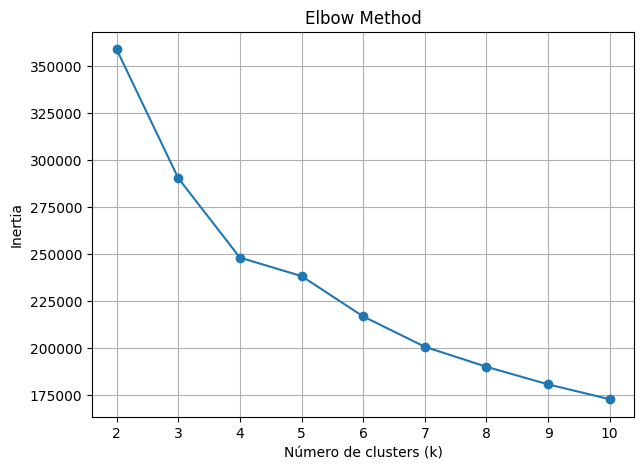

In [23]:
inertias = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(2,11), inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

**Obteniendo el valor k** (Lo mismo)

In [24]:
!pip install kneed           
from kneed import KneeLocator # importamos el paquete para detectar el codo


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# esto puede demorar un par de minutos

sse = [] # acá vamos a guardar el puntaje de la función objetivo

for k in range(1, 40):
  print(k)
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(df_fifa)
  sse.append(kkmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


Text(0, 0.5, 'SSE')

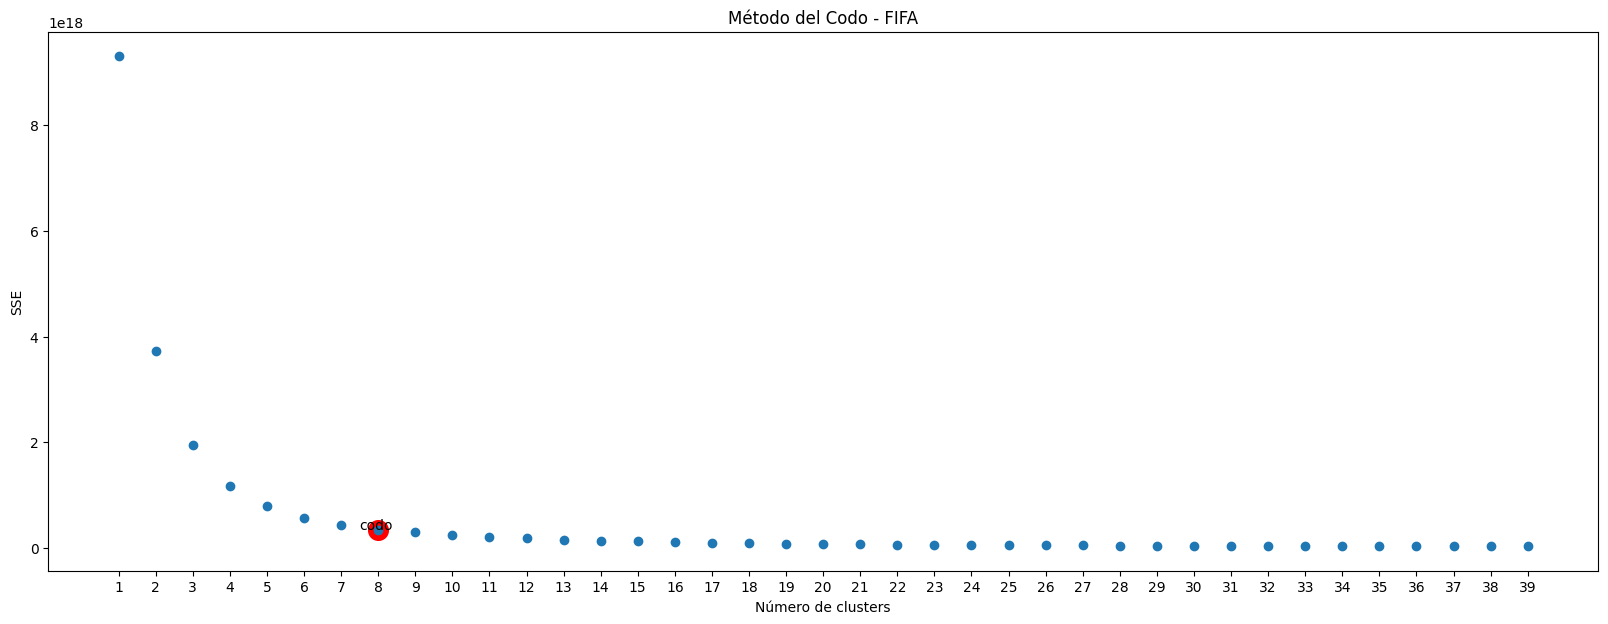

In [26]:
fig, ax = plt.subplots(figsize = (20, 7))

# esta dos lineas las agrego para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(8, sse[7], color='red', s=200) # agregamos un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(7.5, sse[7]-1000, s="codo")       # agregamos un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SSEvsK
plt.title("Método del Codo - FIFA")
ax.scatter(range(1, 40), sse)
ax.set_xticks(range(1, 40))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

Aun así, es muy dificil detectar el codo exactamente con la gráfica. No son muchos los casos donde con un gráfico podamos detectar el codo facilmente.


Usamos la función 'KneeLocator' para detectar el codo. Para ello le tenemos que pasar los valores de K, SEE, la forma de la fución (cóncava o convexa) y la dirección (creciente o decreciente)

In [27]:
kl = KneeLocator(range(1, 40), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)

El codo está en k = 5


### 5. Silhouette Score

Medimos qué tan separadas están las agrupaciones para cada *k*.

In [28]:
from sklearn.metrics import silhouette_score

sil_scores = {}

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil

sil_scores


{
    2: 0.41424293654110045,
    3: 0.22041533878112862,
    4: 0.22347951266657182,
    5: 0.20504494663567677,
    6: 0.1718352259619438,
    7: 0.17005882017083163,
    8: 0.16425942445357034,
    9: 0.16631787073023865,
    10: 0.16060034486788444
}

### Entrenar modelo K-Means 

Seleccionamos el valor óptimo de k basado en:  
- Silhouette Score  
- Elbow Method  

In [32]:
k_opt = 5   # Nuero de clusteres, insertar según lo que salga arriba

kmeans_final = KMeans(n_clusters=k_opt,
                      random_state=42,
                      n_init=10 # el parámetro n_init ejecuta el algoritmo varias veces
                                        # con distintas inicializaciones aleatorias y selecciona
                                        # la mejor solución encontrada (la que tenga menor varianza interna total).       
                     )
cluster_labels = kmeans_final.fit_predict(X_scaled)

df_fifa["Cluster_KMeans"] = cluster_labels

#df.loc[X.index, "cluster"] = clusters #
#df_fifa_22.head()

#### **Centroides**

In [37]:
# Guardo las posiciones de los centroids
centroids = kmeans.cluster_centers_
# Muestro las dimensiones de las posiciones
print("Shape de los centroids:",centroids.shape)
print(centroids)

Shape de los centroids: (10, 12)
[[ 1.13516174  0.87356065  0.15426356  0.74260169  0.62489222  0.71650523
   0.80480056 -0.10025072 -0.09237347  0.17624799  0.4666253   0.61400553]
 [-0.69736802 -1.04273863 -0.45856709 -2.72416581 -2.54525338 -1.98843729
  -2.56029282 -2.42147072 -2.4481059  -2.14717024 -2.45028457 -0.79759315]
 [-0.04875344  0.33540034  0.17310679  0.57552451  0.71574454  0.66726143
   0.42563405  1.00818983  0.92760883  1.05380662  0.45195728 -0.63007901]
 [ 0.50987598 -0.35092579 -1.12172998  0.15586589  0.22311034  0.26614895
   0.07265638  0.33245872  0.35108955  0.33230223  0.37901528  0.16413869]
 [ 0.89501227  0.60586617  0.12799377 -2.37214875 -2.33457501 -1.77406191
  -2.12836553 -1.45901619 -1.47957628 -1.31425973 -1.93305626 -0.01338852]
 [-0.97203509 -1.4195783  -0.63730765 -0.74206066 -0.72167237 -0.7896247
  -0.76164272 -0.2774094  -0.25986056 -0.68342039 -0.33855872 -0.17241345]
 [ 0.04946349  1.50255089  1.51446665  1.07662239  1.06450294  0.97790529


### PCA a 2 componentes para visualizar clusters
- Mencionar este grafico en kedro viz

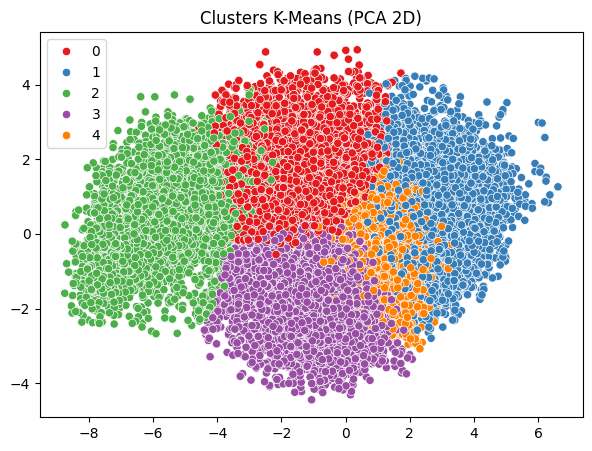

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette="Set1")
plt.title("Clusters K-Means (PCA 2D)")
plt.show()

### Insights por cluster

Promedio de atributos por cluster.

In [40]:
df_fifa.groupby("Cluster_KMeans")[features].mean()

,Age,Overall,Potential,BallControl,Dribbling,Finishing,ShortPassing,Acceleration,SprintSpeed,Agility,Stamina,Strength
Cluster_KMeans,,,,,,,,,,,,
0,28.166002,68.351821,70.740317,60.469952,52.229185,40.566208,62.884056,53.071162,54.946725,53.058422,64.996397,78.312315
1,25.639092,74.723461,78.665194,74.703730,73.718426,63.064125,73.006782,74.847395,74.351351,74.831878,74.381359,67.094852
2,25.619573,65.520790,71.448886,20.504020,14.157363,11.762463,28.140133,38.129336,38.328969,40.305307,30.903974,60.934987
3,19.791136,59.110985,71.808109,56.834606,55.671287,43.771334,55.744083,67.641018,67.144743,63.905516,58.259595,56.434418
4,26.254977,66.648117,69.454625,65.843688,65.271048,55.612697,63.871192,73.975694,73.763572,72.996722,70.464540,64.744863


 Interpretación del K-Means